<a href="https://colab.research.google.com/github/StephanieO-jpg/Core-IP2/blob/master/Moringa_Data_Science_Core_W2_Independent_Project_2019_12_Stephanie_Omwanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reading and Cleaning actions

In [0]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [208]:
# Read csv
finance=pd.read_csv('http://bit.ly/FinancialDataset')
finance.take(np.random.permutation(len(finance))[:15])

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
18876,Tanzania,2017,uniqueid_4074,No,Urban,Yes,2.0,52.0,Male,Head of Household,Single/Never Married,Primary education,Informally employed
19194,Tanzania,2017,uniqueid_4392,No,Urban,No,2.0,60.0,Male,Head of Household,Single/Never Married,Primary education,Self employed
10331,Rwanda,2016,uniqueid_4264,Yes,Rural,Yes,3.0,42.0,Male,Head of Household,Married/Living together,No formal education,Self employed
2019,Kenya,2018,uniqueid_2020,Yes,Urban,Yes,6.0,50.0,Male,Head of Household,Married/Living together,Primary education,Informally employed
10152,Rwanda,2016,uniqueid_4085,No,Rural,Yes,2.0,66.0,Female,Head of Household,Widowed,No formal education,Farming and Fishing
8814,Rwanda,2016,uniqueid_2747,No,Urban,Yes,5.0,57.0,Female,Spouse,Married/Living together,No formal education,Remittance Dependent
18646,Tanzania,2017,uniqueid_3844,No,Urban,Yes,2.0,37.0,Female,Spouse,Single/Never Married,Primary education,Self employed
15851,Tanzania,2017,uniqueid_1049,No,Urban,Yes,2.0,31.0,Female,Parent,Single/Never Married,Primary education,Self employed
7201,Rwanda,2016,uniqueid_1134,No,Rural,Yes,6.0,27.0,Male,Child,Single/Never Married,Primary education,Informally employed
20979,Tanzania,2017,uniqueid_6177,No,Urban,No,2.0,22.0,Female,Spouse,Single/Never Married,No formal education,Self employed


In [209]:
# check data types
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [210]:
# check for missing data
finance.isna().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [211]:
# Check for outliers
q1=finance.quantile(0.25)
q3=finance.quantile(0.75)

iqr=q3-q1
print(iqr)


year               2.0
household_size     3.0
Respondent Age    23.0
dtype: float64


In [212]:
print((finance < (q1-1.5 * iqr)) | ( finance > q3 + 1.5 * iqr))

       Cell Phone Access  Has a Bank account  ...  uniqueid   year
0                  False               False  ...     False  False
1                  False               False  ...     False  False
2                  False               False  ...     False  False
3                  False               False  ...     False  False
4                  False               False  ...     False  False
...                  ...                 ...  ...       ...    ...
23519              False               False  ...     False  False
23520              False               False  ...     False  False
23521              False               False  ...     False  False
23522              False               False  ...     False  False
23523              False               False  ...     False  False

[23524 rows x 13 columns]


In [213]:
# deleting outliers

finance2= finance[~((finance < (q1 - 1.5 * iqr)) |(finance > (q3 + 1.5 * iqr))).any(axis=1)]
print(finance2.shape)

(22903, 13)


In [214]:
# check for duplicated data
finance2.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
23518    False
23519    False
23520    False
23521    False
23522    False
Length: 22903, dtype: bool

In [215]:
#fixing the messy columns
finance2.columns = finance2.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '_').str.replace(',','')
finance2.head()

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [216]:
# Rename a column
finance2.rename(columns={'the_relathip_with_head':'relationship_with_head','level_of_educuation':'level_of_education'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [217]:
# drop irrelevant column
finance2.drop(columns='uniqueid',inplace=False)

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23518,Uganda,2018,No,Rural,Yes,NaN,20.0,Female,Child,Single/Never Married,Primary education,No Income
23519,Uganda,2018,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income


In [218]:
# Display mode and median
print(
    finance2['country'].mode(),
    finance2['gender_of_respondent'].mode(),
    finance2['has_a_bank_account'].mode(),
    finance2['household_size'].median(),
    finance2['level_of_education'].mode(),
    finance2['marital_status'].mode(),
    finance2['relationship_with_head'].mode(),
    finance2['respondent_age'].median(),
    finance2['type_of_job'].mode(),
    finance2['type_of_location'].mode(),
    finance2['cell_phone_access'].mode(),

    
)

0    Rwanda
dtype: object 0    Female
dtype: object 0    No
dtype: object 3.0 0    Primary education
dtype: object 0    Married/Living together
dtype: object 0    Head of Household
dtype: object 35.0 0    Self employed
dtype: object 0    Rural
dtype: object 0    Yes
dtype: object


In [219]:
# filling missing values with mode and median
finance2['country']=finance2['country'].fillna('Rwanda')
finance2['gender_of_respondent']=finance2['gender_of_respondent'].fillna('Female')
finance2['has_a_bank_account']=finance2['has_a_bank_account'].fillna('No')
finance2['household_size']=finance2['household_size'].fillna(3.0)
finance2['level_of_education']=finance2['level_of_education'].fillna('Primary education')
finance2['marital_status']=finance2['marital_status'].fillna('Married/Living together')
finance2['relationship_with_head']=finance2['relationship_with_head'].fillna('Head of Household')
finance2['respondent_age']=finance2['respondent_age'].fillna(35.0)
finance2['type_of_job']=finance2['type_of_job'].fillna('Self employed')
finance2['type_of_location']=finance2['type_of_location'].fillna('Rural')
finance2['cell_phone_access']=finance2['cell_phone_access'].fillna('Yes')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [220]:
finance2.isna().sum()

country                   0
year                      0
uniqueid                  0
has_a_bank_account        0
type_of_location          0
cell_phone_access         0
household_size            0
respondent_age            0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
level_of_education        0
type_of_job               0
dtype: int64

## Univariate Summaries

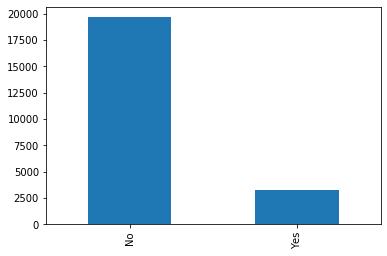

In [221]:
finance2['has_a_bank_account'].value_counts().head(10).plot.bar()

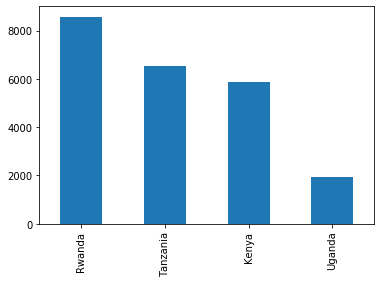

In [222]:
finance2['country'].value_counts().head(10).plot.bar()

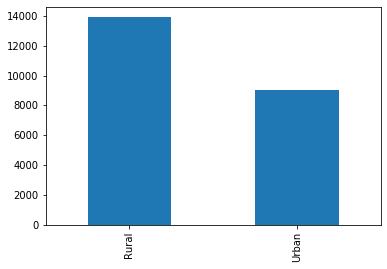

In [223]:
finance2['type_of_location'].value_counts().head(10).plot.bar()


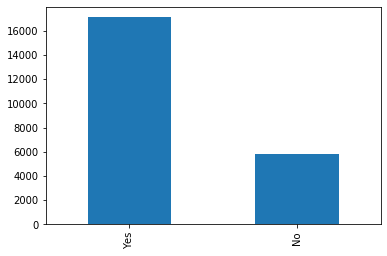

In [224]:
finance2['cell_phone_access'].value_counts().head(10).plot.bar()

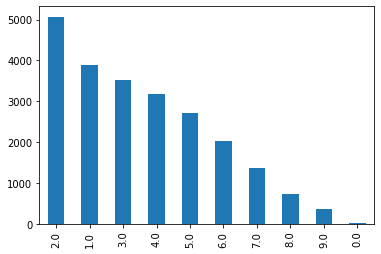

In [225]:
finance2['household_size'].value_counts().head(10).plot.bar()

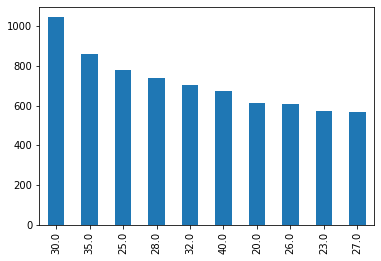

In [226]:
finance2['respondent_age'].value_counts().head(10).plot.bar()

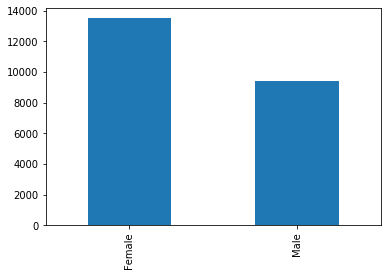

In [227]:
finance2['gender_of_respondent'].value_counts().head(10).plot.bar()

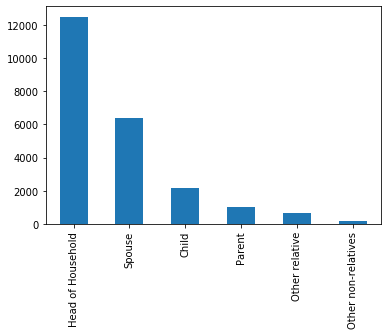

In [228]:
finance2['relationship_with_head'].value_counts().head(10).plot.bar()

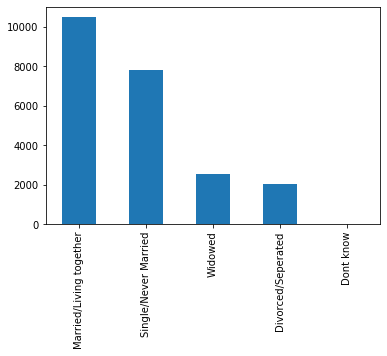

In [229]:
finance2['marital_status'].value_counts().head(10).plot.bar()

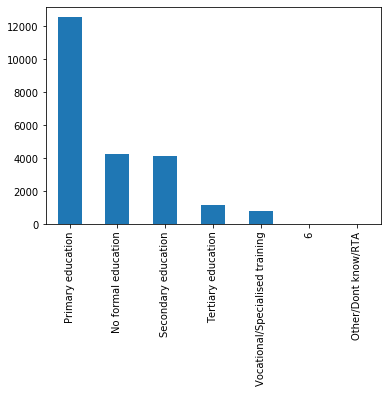

In [230]:
finance2['level_of_education'].value_counts().head(10).plot.bar()

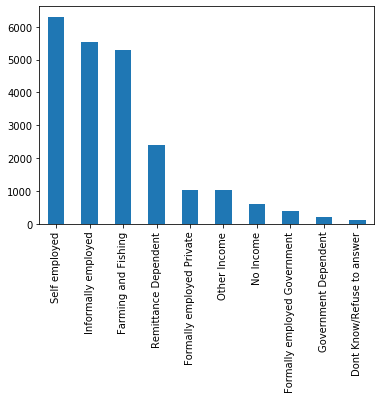

In [231]:
finance2['type_of_job'].value_counts().head(10).plot.bar()

## Bivariate summaries

<function matplotlib.pyplot.show>

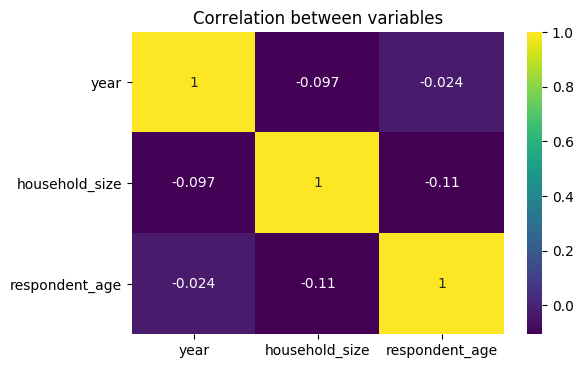

In [232]:
#Checking for correlations between the variables
plt.figure(dpi=100)
cor=finance2.corr()
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot = True ,cmap='viridis')
plt.title('Correlation between variables')
plt.show

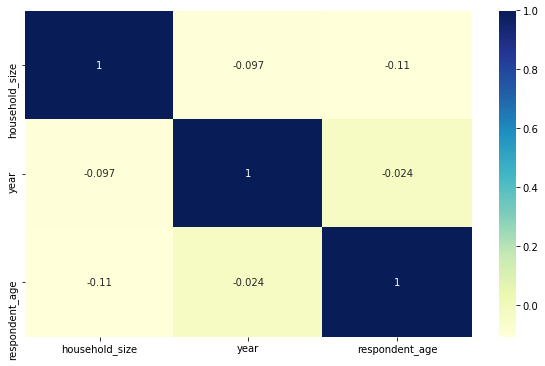

In [233]:

k = 13 #number of variables for heatmap
cols = finance2.corr().nlargest(k, 'household_size')['household_size'].index
cm = finance2[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'YlGnBu')

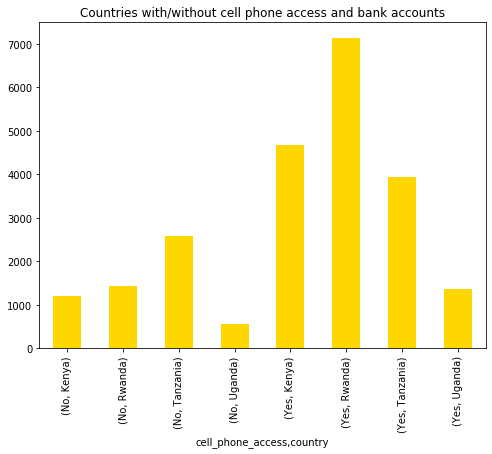

In [237]:
# Checking relation between cell phone and ownership of a bank account per countries
fin=finance2.groupby (['cell_phone_access','country'])['has_a_bank_account'].count()
plt.title('Countries with/without cell phone access and bank accounts')
fin.plot(kind='bar',  color='gold', figsize=(8, 6), stacked=True)

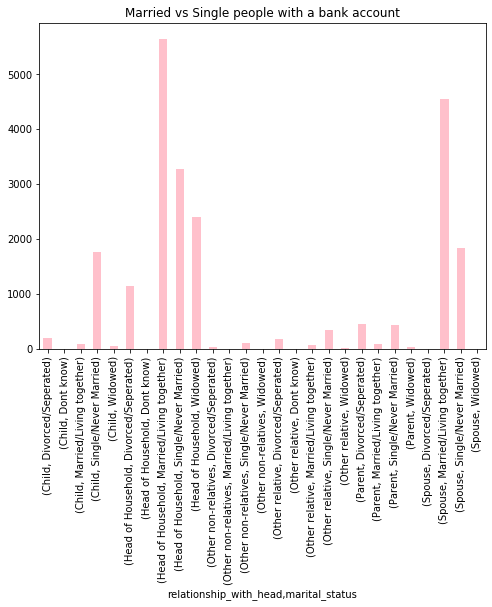

In [239]:
# checking relation of marital status and head of household to ownership of a bank account
fin=finance2.groupby (['relationship_with_head','marital_status'])['has_a_bank_account'].count()
plt.title('Married vs Single people with a bank account')
fin.plot(kind='bar',  color='pink', figsize=(8, 6), stacked=True)

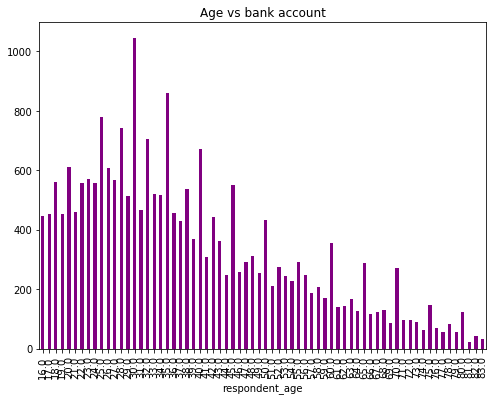

In [244]:
# checking relation of marital status and head of household to ownership of a bank account
fin=finance2.groupby (['respondent_age'])['has_a_bank_account'].count()
plt.title('Age vs bank account')
fin.plot(kind='bar',  color='purple', figsize=(8, 6), stacked=True)

## Analysis

PCA

In [0]:
#Preprocessing
#divide the dataset into a feature set and corresponding labels
x = finance2.iloc[:, 6:-5].values
#y = finance2[['country',	'year',	'has_a_bank account',	'type_of_location',	'cell_phone_access','gender_of_respondent','the_relationship_with_head'	,'marital_status','level_of_educuation'	,'type_of_job']].values
y=finance2['gender_of_respondent']


In [256]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train, x_test, y_train, y_test

(array([[ 3., 24.],
        [ 4., 23.],
        [ 6., 58.],
        ...,
        [ 5., 16.],
        [ 4., 25.],
        [ 6., 30.]]), array([[ 9., 34.],
        [ 3., 16.],
        [ 2., 45.],
        ...,
        [ 5., 32.],
        [ 4., 55.],
        [ 2., 26.]]), 2478     Female
 11276      Male
 2295       Male
 18558    Female
 2678       Male
           ...  
 13467      Male
 20074    Female
 10121    Female
 11090      Male
 2831     Female
 Name: gender_of_respondent, Length: 18322, dtype: object, 23210    Female
 5368     Female
 18462      Male
 15401      Male
 8592       Male
           ...  
 8050       Male
 13069    Female
 12163    Female
 2235       Male
 17402      Male
 Name: gender_of_respondent, Length: 4581, dtype: object)

In [0]:
#Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [0]:
# Applying PCA

from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [262]:
#Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.55397046, 0.44602954])

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [266]:
# forecasting
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [267]:
# evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test, y_pred))
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[2696   25]
 [1815   45]]
Accuracy0.5983409735865531


Discriminant analysis

In [0]:
#Preprocessing
#divide the dataset into a feature set and corresponding labels
x = finance2.iloc[:, 6:-5].values
#y = finance2[['country',	'year',	'uniqueid',	'Has a Bank account',	'Type of Location',	'Cell Phone Access','gender_of_respondent'	,'The relathip with head'	,'marital_status','Level of Educuation'	,'Type of Job']].values
y=finance2['gender_of_respondent']

In [269]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train, x_test, y_train, y_test

(array([[ 3., 24.],
        [ 4., 23.],
        [ 6., 58.],
        ...,
        [ 5., 16.],
        [ 4., 25.],
        [ 6., 30.]]), array([[ 9., 34.],
        [ 3., 16.],
        [ 2., 45.],
        ...,
        [ 5., 32.],
        [ 4., 55.],
        [ 2., 26.]]), 2478     Female
 11276      Male
 2295       Male
 18558    Female
 2678       Male
           ...  
 13467      Male
 20074    Female
 10121    Female
 11090      Male
 2831     Female
 Name: gender_of_respondent, Length: 18322, dtype: object, 23210    Female
 5368     Female
 18462      Male
 15401      Male
 8592       Male
           ...  
 8050       Male
 13069    Female
 12163    Female
 2235       Male
 17402      Male
 Name: gender_of_respondent, Length: 4581, dtype: object)

In [0]:
#Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [0]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

In [273]:
# predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [275]:
# evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test, y_pred))
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[2676   45]
 [1784   76]]
Accuracy0.6007421960270684


## Recommendation

1. It has been noted that most people with cell phones don't have bank accounts, so I'd advise that a mobile banking platform is created for ease of access
2. Because most people in the rural areas seem to be lacking bank accounts, there should be sensitization on the need and benefits of having a bank account
